In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 64
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-25 14:50:44,835 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-25 14:50:44,836 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-25 14:50:44,843 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 14:50:44,845 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 14:50:44,847 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 14:50:44,848 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 14:50:44,848 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 14:50:44,848 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 14:50:44,850 - INFO - Class 'fire' has 730 samples.
2024-12-25 14:50:44,852 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 14:50:44,853 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-25 14:50:46,016 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: mobilenetv2\n")
print("[INFO] Initializing mobilenetv2 model...")
model = initialize_model(
    model_name="mobilenet_v2",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: mobilenetv2

[INFO] Initializing mobilenetv2 model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
import time

# Start the timer
start_time = time.time()
print("Training started...")


print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/mobilenet_v2.pth",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8284
Epoch [1]: Train Loss: 0.5689, Train Acc: 0.7191 | Val Loss: 0.4883, Val Acc: 0.7836, Val Recall: 0.8537, Val F1: 0.8284


[INFO] Best model saved with val_f1: 0.8544
Epoch [2]: Train Loss: 0.4576, Train Acc: 0.7970 | Val Loss: 0.4289, Val Acc: 0.8134, Val Recall: 0.8943, Val F1: 0.8544


[INFO] Best model saved with val_f1: 0.8566
Epoch [3]: Train Loss: 0.3916, Train Acc: 0.8331 | Val Loss: 0.4021, Val Acc: 0.8209, Val Recall: 0.8740, Val F1: 0.8566


[INFO] Best model saved with val_f1: 0.8723
Epoch [4]: Train Loss: 0.3629, Train Acc: 0.8537 | Val Loss: 0.3857, Val Acc: 0.8383, Val Recall: 0.9024, Val F1: 0.8723


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [5]: Train Loss: 0.3789, Train Acc: 0.8294 | Val Loss: 0.3784, Val Acc: 0.8234, Val Recall: 0.8455, Val F1: 0.8542


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [6]: Train Loss: 0.3402, Train Acc: 0.8627 | Val Loss: 0.3771, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [7]: Train Loss: 0.3399, Train Acc: 0.8580 | Val Loss: 0.3622, Val Acc: 0.8333, Val Recall: 0.8943, Val F1: 0.8679


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [8]: Train Loss: 0.3226, Train Acc: 0.8633 | Val Loss: 0.3745, Val Acc: 0.8308, Val Recall: 0.8374, Val F1: 0.8583


[INFO] Best model saved with val_f1: 0.8803
Epoch [9]: Train Loss: 0.3187, Train Acc: 0.8707 | Val Loss: 0.3556, Val Acc: 0.8532, Val Recall: 0.8821, Val F1: 0.8803


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [10]: Train Loss: 0.2941, Train Acc: 0.8818 | Val Loss: 0.3524, Val Acc: 0.8483, Val Recall: 0.8699, Val F1: 0.8753


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [11]: Train Loss: 0.3302, Train Acc: 0.8564 | Val Loss: 0.3453, Val Acc: 0.8507, Val Recall: 0.8902, Val F1: 0.8795


[INFO] Best model saved with val_f1: 0.8831
Epoch [12]: Train Loss: 0.3129, Train Acc: 0.8638 | Val Loss: 0.3408, Val Acc: 0.8557, Val Recall: 0.8902, Val F1: 0.8831


[INFO] Best model saved with val_f1: 0.8876
Epoch [13]: Train Loss: 0.3182, Train Acc: 0.8612 | Val Loss: 0.3355, Val Acc: 0.8607, Val Recall: 0.8984, Val F1: 0.8876


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [14]: Train Loss: 0.2959, Train Acc: 0.8707 | Val Loss: 0.3412, Val Acc: 0.8532, Val Recall: 0.8577, Val F1: 0.8773


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [15]: Train Loss: 0.3077, Train Acc: 0.8691 | Val Loss: 0.3310, Val Acc: 0.8557, Val Recall: 0.8862, Val F1: 0.8826


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [16]: Train Loss: 0.3007, Train Acc: 0.8739 | Val Loss: 0.3313, Val Acc: 0.8532, Val Recall: 0.8699, Val F1: 0.8789


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [17]: Train Loss: 0.3020, Train Acc: 0.8680 | Val Loss: 0.3343, Val Acc: 0.8532, Val Recall: 0.9024, Val F1: 0.8827


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [18]: Train Loss: 0.3051, Train Acc: 0.8680 | Val Loss: 0.3337, Val Acc: 0.8557, Val Recall: 0.8821, Val F1: 0.8821


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [19]: Train Loss: 0.3151, Train Acc: 0.8596 | Val Loss: 0.3395, Val Acc: 0.8532, Val Recall: 0.8618, Val F1: 0.8778


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [20]: Train Loss: 0.2809, Train Acc: 0.8813 | Val Loss: 0.3285, Val Acc: 0.8582, Val Recall: 0.8821, Val F1: 0.8839


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [21]: Train Loss: 0.3019, Train Acc: 0.8633 | Val Loss: 0.3265, Val Acc: 0.8557, Val Recall: 0.8984, Val F1: 0.8840


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [22]: Train Loss: 0.2795, Train Acc: 0.8744 | Val Loss: 0.3251, Val Acc: 0.8607, Val Recall: 0.8902, Val F1: 0.8866


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [23]: Train Loss: 0.2890, Train Acc: 0.8718 | Val Loss: 0.3193, Val Acc: 0.8532, Val Recall: 0.8902, Val F1: 0.8813


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [24]: Train Loss: 0.2755, Train Acc: 0.8850 | Val Loss: 0.3252, Val Acc: 0.8582, Val Recall: 0.8821, Val F1: 0.8839


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [25]: Train Loss: 0.2742, Train Acc: 0.8829 | Val Loss: 0.3262, Val Acc: 0.8607, Val Recall: 0.8902, Val F1: 0.8866
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 25 epochs. Best val_f1: 0.8876

[INFO] Training completed successfully!
Training completed in 0 hours, 1 minutes, and 39 seconds.


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="mobilenetv2",
    save_base_path="outputs/plots/baseline/mobilenetv2",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline/mobilenetv2\mobilenetv2\mobilenetv2_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8679245283018868, 'recall': 0.8679245283018868, 'f1-score': 0.8679245283018868, 'support': 159.0}, 'Fire': {'precision': 0.9163346613545816, 'recall': 0.9163346613545816, 'f1-score': 0.9163346613545816, 'support': 251.0}, 'accuracy': 0.8975609756097561, 'macro avg': {'precision': 0.8921295948282342, 'recall': 0.8921295948282342, 'f1-score': 0.8921295948282342, 'support': 410.0}, 'weighted avg': {'precision': 0.8975609756097561, 'recall': 0.8975609756097561, 'f1-score': 0.8975609756097561, 'support': 410.0}}, 'confusion_matrix': [[138, 21], [21, 230]], 'roc_auc': 0.9562755268235236, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Training plot saved to outputs/plots/baseline/mobilenetv2_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/mobilenetv2_baseline_confusion_matrix.png
[INFO] All results saved successfully!


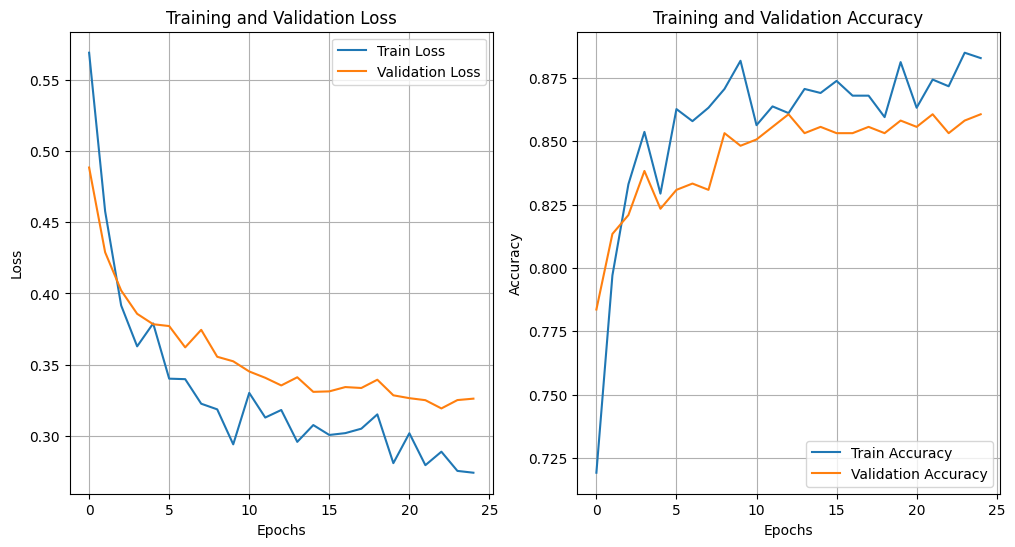

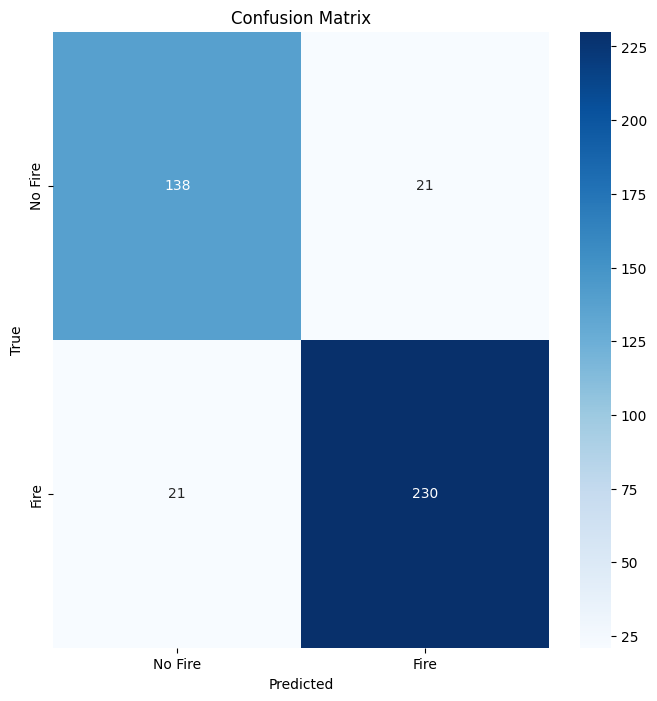

: 

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/mobilenetv2_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/mobilenetv2_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/mobilenetv2_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/mobilenetv2_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")